In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zadchin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
## Read mozi_frmt.txt to pandas dataframe
mozi_df = pd.read_csv('data/mozi_frmt.txt', sep="\t", header=None)
conf_df = pd.read_csv('data/analects_frmt.txt', sep="\t", header=None)
mozi_df.columns = ['text']
conf_df.columns = ['text']

In [42]:
mozi_df.head()

,text
0,part i
1,the epitomes
2,being sympathetic to officers
3,qin shi
4,. to take control of a state and not be symp...


In [43]:
conf_df.head()

,text
0,the master is it not pleasant to learn with a...
1,and application?
2,is it not delightful to have friends coming f...
3,"is he not a man of complete virtue, who feels..."
4,men may take no note of him?


In [44]:
## stop words
stop_words = stopwords.words('english')

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # # stemm or lemmatise words
    # stemmed_words = []
    # for word in cleaned_words:
    #     word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
    #     stemmed_words.append(word)
    
    # converting list back to string
    return (" ".join(cleaned_words))

In [45]:
mozi_df['prep'] = mozi_df['text'].apply(preprocess)  
mozi_df.head()

,text,prep
0,part i,part
1,the epitomes,epitomes
2,being sympathetic to officers,sympathetic officers
3,qin shi,qin shi
4,. to take control of a state and not be symp...,take control state sympathetic


In [46]:
conf_df['prep'] = conf_df['text'].apply(preprocess)
conf_df.head()

,text,prep
0,the master is it not pleasant to learn with a...,master pleasant learn constant perseverance
1,and application?,application
2,is it not delightful to have friends coming f...,delightful friends coming distant quarters
3,"is he not a man of complete virtue, who feels...",man complete virtue feels discomposure though
4,men may take no note of him?,men may take note


In [23]:
## replace peopl in prep column with people
mozi_df['prep'] = mozi_df['prep'].str.replace('peopl', 'people')

In [35]:
conf_df['prep'] = conf_df['prep'].str.replace('peopl', 'people')

In [47]:
from collections import Counter
Counter(" ".join(mozi_df["prep"]).split()).most_common(10)

[('people', 885),
 ('one', 681),
 ('world', 497),
 ('heaven', 474),
 ('master', 384),
 ('mo', 383),
 ('e', 367),
 ('said', 327),
 ('must', 319),
 ('like', 308)]

In [48]:
Counter(" ".join(conf_df["prep"]).split()).most_common(10)

[('said', 621),
 ('master', 526),
 ('man', 239),
 ('tsze', 179),
 ('may', 140),
 ('one', 126),
 ('virtue', 107),
 ('asked', 101),
 ('ch', 99),
 ('people', 96)]

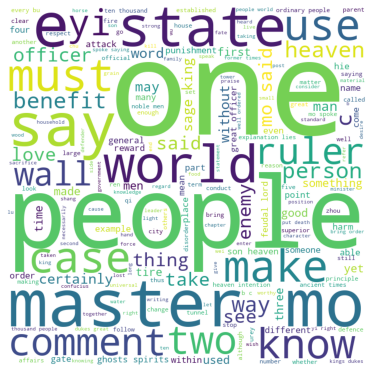

In [49]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in mozi_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

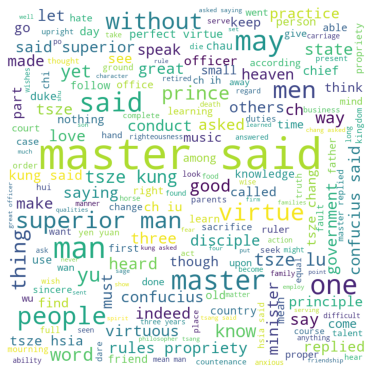

In [64]:
## wordcloud for analects
all_words = ''

for arg in conf_df["prep"]:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [53]:
## THE TOP 10 words that are in mozi_df['prep'] but not in  conf_df['prep']
mozi_df_prep = mozi_df['prep'].str.split(expand=True).stack().value_counts()
conf_df_prep = conf_df['prep'].str.split(expand=True).stack().value_counts()
mozi_df_prep[~mozi_df_prep.index.isin(conf_df_prep.index)].head(20)

mo           383
e            367
c            280
comment      240
ghosts       188
enemy        185
b            169
noble        164
tire         143
zhou         127
ren          124
someone      118
universal    116
bu           105
wen          104
lies         103
hie           98
defence       91
zi            88
feudal        87
dtype: int64

In [54]:
## the top 20 words in conf_df['prep'] but not in mozi_df['prep']
conf_df_prep[~conf_df_prep.index.isin(mozi_df_prep.index)].head(20)

tsze           179
ch              99
kung            76
chung           34
hsia            33
yen             26
ang             25
iu              24
tsang           24
po              22
chau            20
ih              18
philosopher     17
kwan            16
talents         14
retired         13
hsi             12
ts              11
friendship      10
sovereign       10
dtype: int64

In [71]:
## the top 20 words that are in both mozi_df['prep'] and conf_df['prep']
df_comm = mozi_df_prep[mozi_df_prep.index.isin(conf_df_prep.index)]
## df_comm column name = [words, count]
df_comm = df_comm.to_frame()
df_comm.columns = ['count']
df_comm['words'] = df_comm.index
df_comm = df_comm[['words', 'count']]
df_comm.head(20)


,words,count
people,people,885
one,one,681
world,world,497
heaven,heaven,474
master,master,384
said,said,327
must,must,319
like,like,308
would,would,306
men,men,291


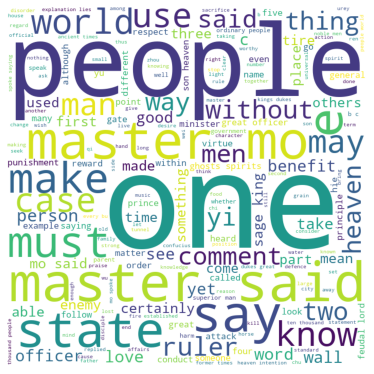

In [73]:
## all_word equal to words in mozi_df['prep'] and conf_df['prep']

all_words = ''

for arg in mozi_df["prep"]:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "

for arg in conf_df["prep"]:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()